In [7]:
# %load stateflowers.py
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
from fiona.crs import from_epsg
%matplotlib inline

In [10]:
flowers = pd.read_csv('./stateflowers.txt', delimiter='\t')
flowers[flowers.State=='Ohio']

,State,Common name
38,Ohio,Scarlet carnation


In [3]:
flowers[flowers['Common name']=='Violet']

,State,Common name
15,Illinois,Violet
32,New Jersey,Violet
43,Rhode Island,Violet


In [5]:
states = gpd.read_file('./data/cb_2016_us_state_5m.shp')

In [6]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"(POLYGON ((-88.04374299999999 30.517423, -88.0..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"(POLYGON ((-133.655819 55.625617, -133.624921 ..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.799683 32.593621, -114.809393 3..."
3,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.060253 38.599328, -109.059541 3..."
4,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777499999999 41.100696, -73.69..."


In [8]:
states = states.merge(flowers, left_on='NAME', right_on='State')

In [9]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,State,Common name
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"(POLYGON ((-88.04374299999999 30.517423, -88.0...",Alabama,Camellia
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"(POLYGON ((-133.655819 55.625617, -133.624921 ...",Alaska,Forget-me-not
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.799683 32.593621, -114.809393 3...",Arizona,Saguaro cactus blossom
3,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.060253 38.599328, -109.059541 3...",Colorado,Rocky Mountain columbine
4,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"POLYGON ((-73.72777499999999 41.100696, -73.69...",Connecticut,Mountain laurel


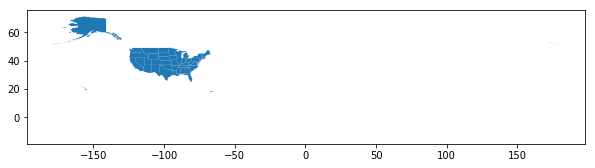

In [18]:
states.plot(figsize=(10,10))

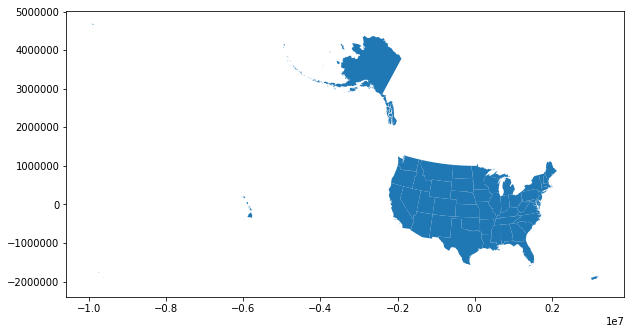

In [19]:
states.crs = from_epsg(4326)
naec = '+proj=eqdc +lat_0=40 +lon_0=-96 +lat_1=20 +lat_2=60 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs'
states.to_crs(naec).plot(figsize=(10,10))

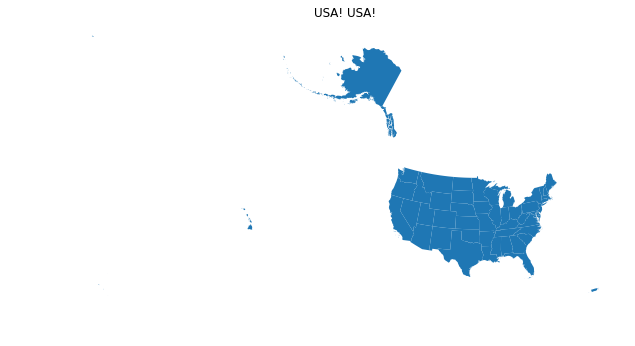

In [20]:
ax = states.to_crs(naec).plot(figsize=(10,10))
ax.set_axis_off()
ax.set_title('USA! USA!')
ax.set_aspect(1)

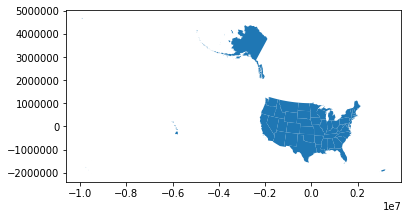

In [21]:
states_proj = states.to_crs(naec)
states_proj.plot()

(-1750000.0, 1750000.0)

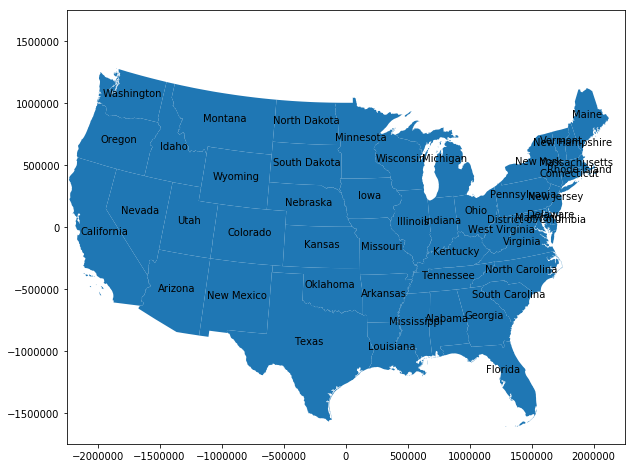

In [53]:
ax = states_proj.plot(figsize=(10,10))
states_proj.apply(lambda state: 
                  ax.annotate(s=state.NAME, 
                              xy=state.geometry.centroid.coords[0], 
                              ha='center', clip_on=True), axis=1);

ax.set_xlim((-2.25e6,2.25e6))
ax.set_ylim((-1.75e6,1.75e6))

Text(0.5,1,'USA state flowers')

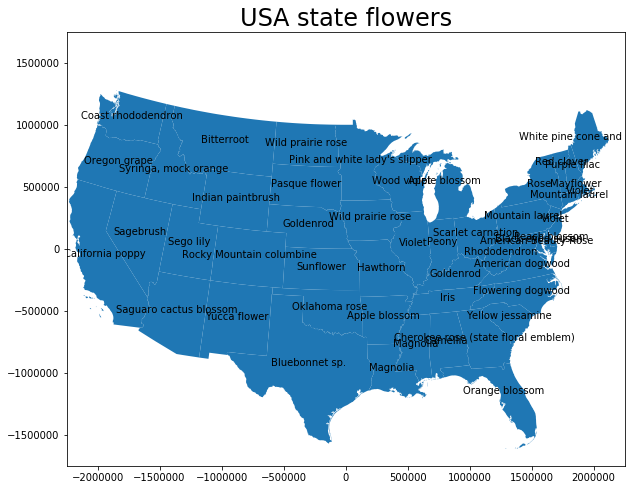

In [59]:
ax = states_proj.plot(figsize=(10,10))
states_proj.apply(lambda state: 
                  ax.annotate(s=state['Common name'], 
                              xy=state.geometry.centroid.coords[0], 
                              ha='center', clip_on=True), axis=1)
ax.set_xlim((-2.25e6,2.25e6))
ax.set_ylim((-1.75e6,1.75e6))
ax.set_title('USA state flowers', fontsize=24)

In [57]:
states.centroids = states.geometry.centroid
states.centroids

0      POINT (-86.82856727863836 32.78871085643125)
1      POINT (-152.2112567184512 64.19854169796479)
2      POINT (-111.6646390712508 34.29321115005884)
3      POINT (-105.5478146961501 38.99854551511103)
4      POINT (-72.72640497760267 41.62014853607063)
5       POINT (-82.4977195750063 28.62031342376801)
6       POINT (-83.44579716498156 32.6491778444807)
7      POINT (-114.6593242356111 44.38915930323095)
8        POINT (-86.2756254985561 39.9081367310627)
9      POINT (-98.38021614182942 38.48469938007206)
10     POINT (-91.97327150813439 31.04847772977295)
11     POINT (-71.79509897430435 42.25228990949797)
12     POINT (-94.30873988005874 46.31643137852156)
13     POINT (-92.47742457510013 38.36765846221193)
14     POINT (-109.6450091135248 47.03355906309619)
15     POINT (-116.6553851531073 39.35643474393473)
16     POINT (-74.66081603540738 40.18417144063729)
17     POINT (-75.50260474511218 42.94015453739781)
18     POINT (-100.4693146192818 47.44633606248693)
19     POINT